# Traballo 1

### Car sales data

Obxectivo: Predicir o prezo dos coches introducindo certos datos

In [33]:
# Imports das librerías
import numpy as np 
import pandas as pd
## Para ploteo
import seaborn as sns
import matplotlib.pyplot as plt    

In [34]:
df = pd.read_csv("car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [35]:
print( "Os parámetros deste dataset son: " ); print( df.columns.to_list() )

Os parámetros deste dataset son: 
['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [37]:
# Cambiamos os data types das columnas (para poder traballar con eles)
# obj --> int8
df_copy = df.copy()
df_copy["Manufacturer"] = df["Manufacturer"].astype('category').cat.codes
df_copy["Model"] = df["Model"].astype('category').cat.codes
df_copy["Fuel type"] = df["Fuel type"].astype('category').cat.codes

df_copy.info()
df_copy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  int8   
 1   Model                50000 non-null  int8   
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  int8   
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), int8(3)
memory usage: 1.7 MB


(50000, 7)

### Matriz de Correlación

Imos ver a **Matriz de correlación** das variables para ver cales están máis correlacionadas entre sí.

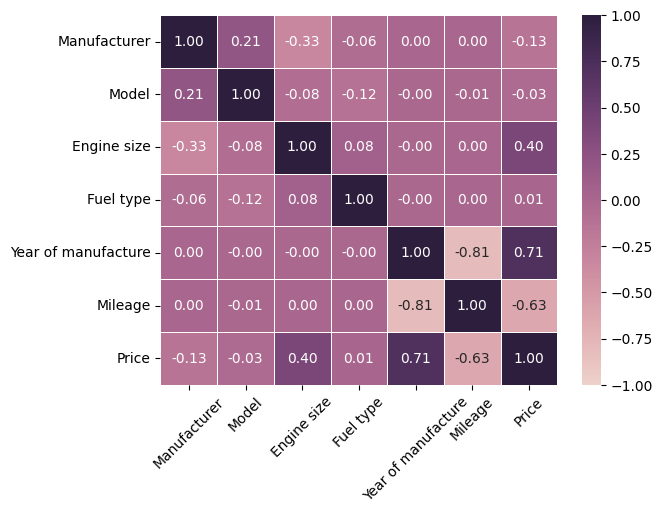

In [38]:

corr_matrix = df_copy.corr() # Matriz de correlación

# Visualización da matriz de correlación
ax = sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, fmt=".2f", linewidth=0.5, cmap= sns.cubehelix_palette(as_cmap=True))
# annot --> para ver os valores na matriz
# fmt --> para controlar o formato dos valores na matriz
# cmap --> para cambiar o mapa de cores
# linewidth --> para o grosor da separación entre celas 
# vmax e vmin --> para controlar o rango de valores nos que se van a mapear ás cores

ax.xaxis.set_tick_params(rotation=45) #rota os nomes das columnas

Vemos que hai dúas variables moi correlacionadas co prezo i entre si:
* **Mileage**
* **Year of manufacture**

1. O motivo da súa relación mútua é evidente: *Canto máis vello o coche, máis probable é que recorrera máis km*.
2. O motivo da súa relación co prezo tamén é evidente: *Canto máis usado o coche, menos interés hai na súa compra*.


! Pode ser que teñamos que ter coidado con estas dúas variables, non queremos que estas pesen moito máis que as demais no custo do coche.

## Visualización

/tmp/ipykernel_5552/366418804.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


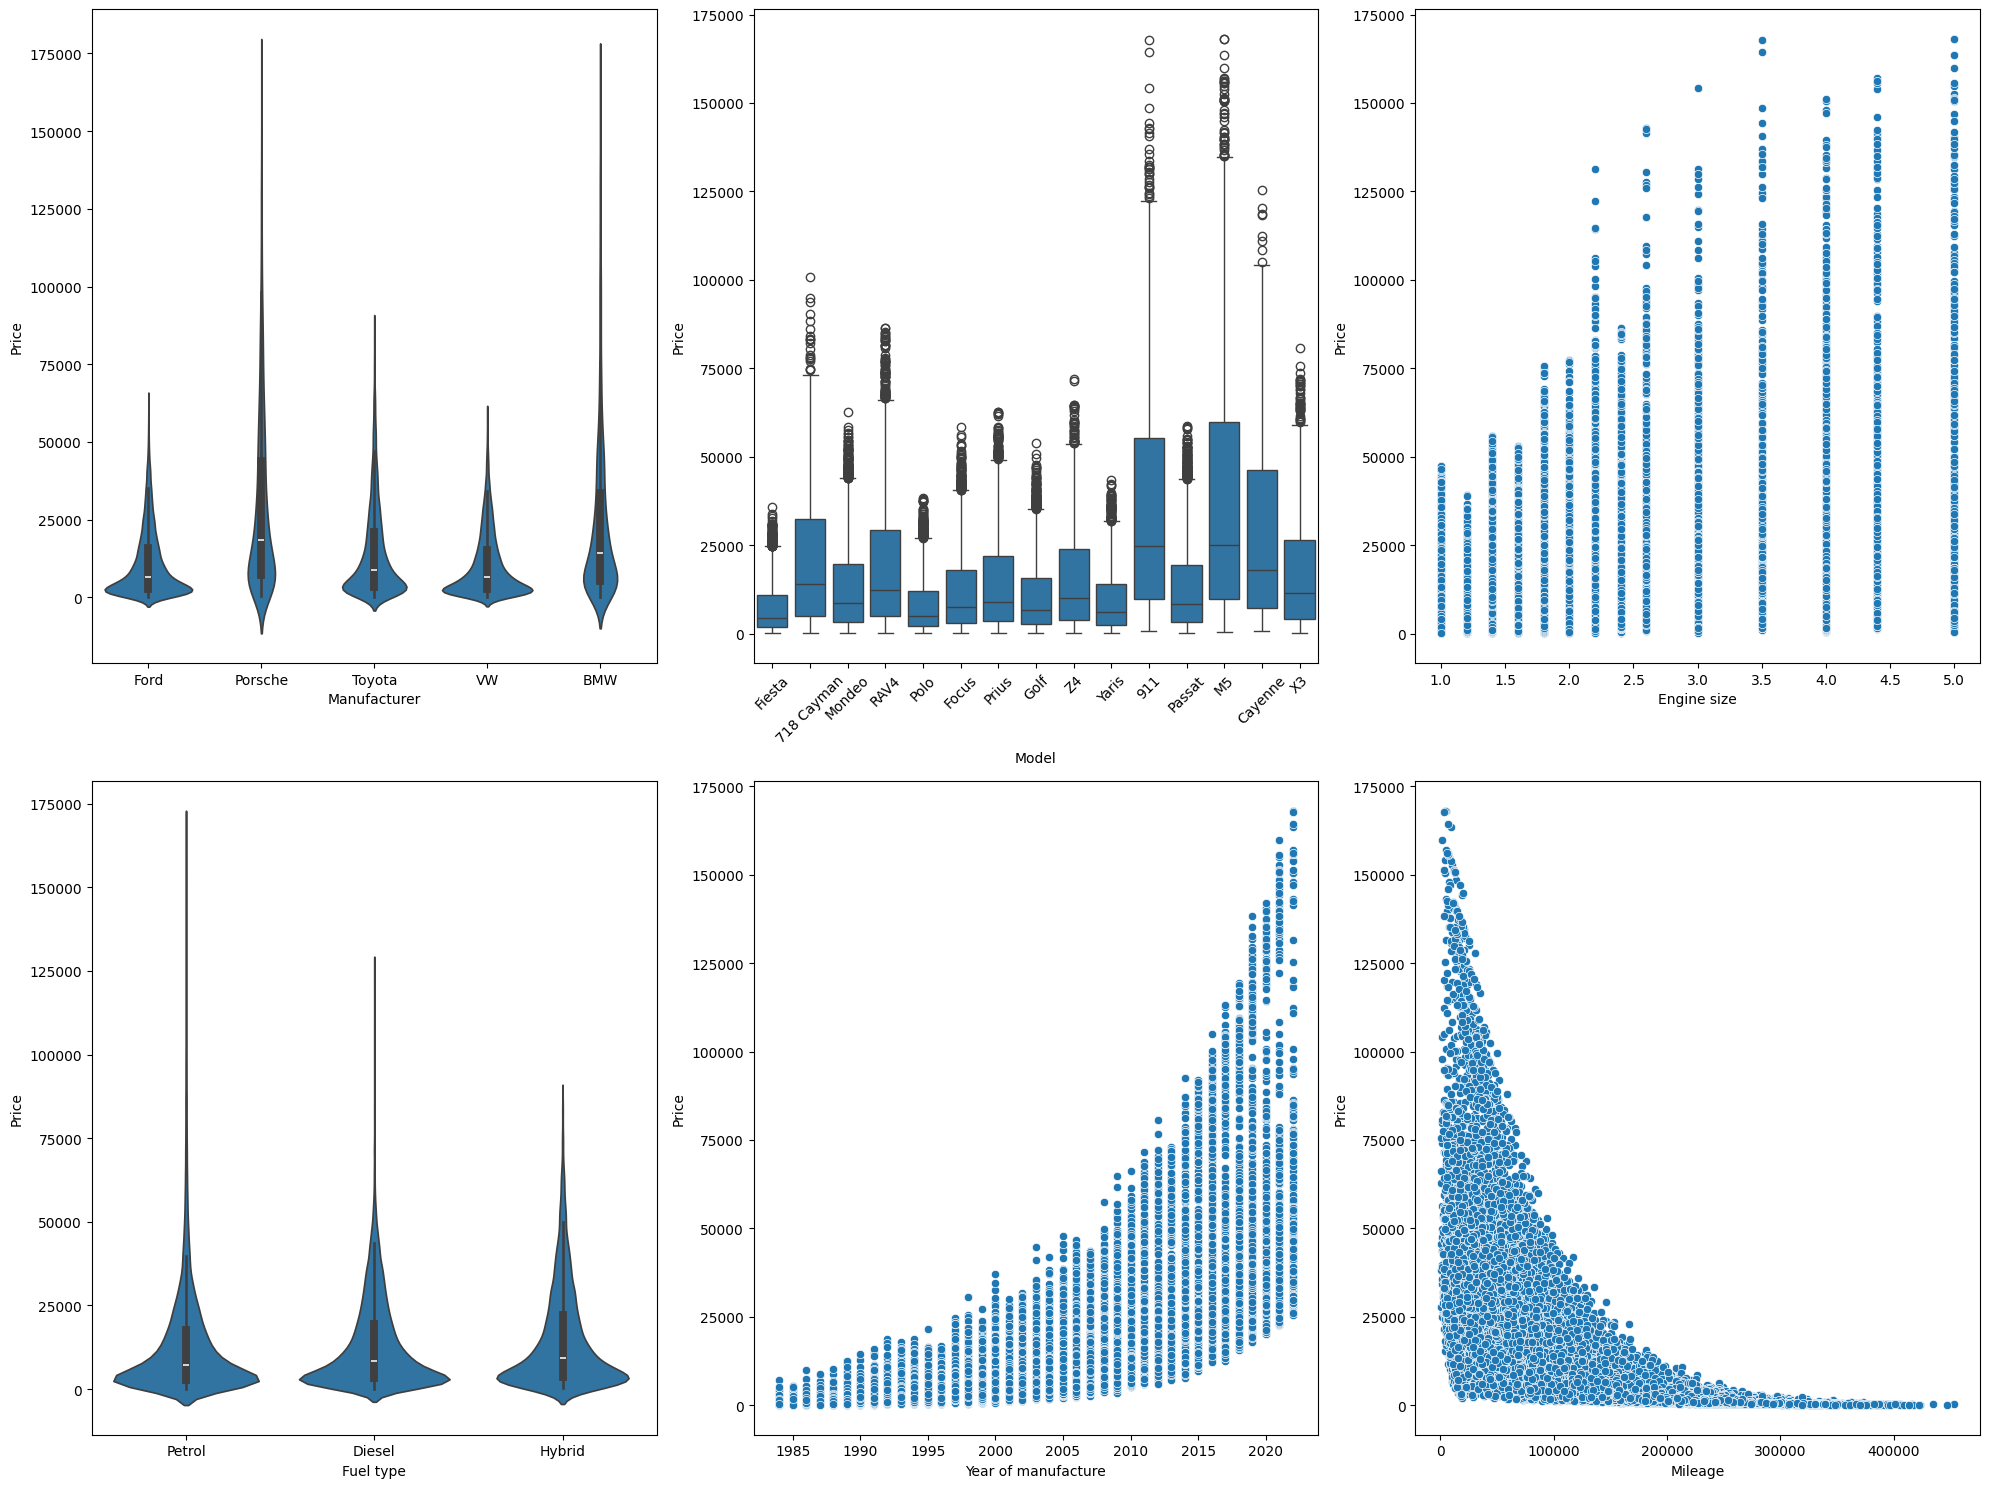

In [39]:
fig, axs = plt.subplots(2, 3, figsize= (20, 15))

#print(axs.shape[1])
#print(axs.size)
"""
i = 0
j = 0
for n in range(axs.size):
    if j >= axs.shape[1]:
        i += 1
        j = 0
    print(i, j)
    
    sns.scatterplot(data=df, x=df.columns.to_list()[n], y="Price", ax = axs[i, j])
    axs[i, j].xaxis.set_tick_params(rotation=45)
    
    j += 1
plt.tight_layout()
"""
sns.violinplot(data=df, x= "Manufacturer", y="Price", ax = axs[0, 0])
sns.boxplot(data=df, x= "Model", y="Price", ax = axs[0, 1])
sns.scatterplot(data=df, x="Engine size", y="Price", ax = axs[0, 2])
sns.violinplot(data=df, x="Fuel type", y="Price", ax = axs[1, 0])
sns.scatterplot(data=df, x="Year of manufacture", y="Price", ax = axs[1, 1])
sns.scatterplot(data=df, x="Mileage", y="Price", ax = axs[1, 2])

axs[0,1].xaxis.set_tick_params(rotation=45)

fig.tight_layout()
fig.show()


## Preparación dos datos

Non uso a variable "Model"

In [40]:
#Elixo as variables a estudar
vars = ["Manufacturer", "Fuel type", "Engine size", "Year of manufacture", "Mileage"] # Variables independentes
obj = "Price" # Variable obxectivo

# Cambio o formato dos datos
# DataFrame --> array
print( "Antes do cambio de formato: " ); print( " df -> ", type(df) , df.shape ); print("")  
x = df[vars].values
y = df[obj].values.reshape(-1, 1) # Necesito facer o reshape (ten que ser unha matriz 2D, non un vector)
print( "Despois do cambio de formato: " ); print( " x --> ",type(x), x.shape,"\n y --> ", type(y) , y.shape)

print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )


Antes do cambio de formato: 
 df ->  <class 'pandas.core.frame.DataFrame'> (50000, 7)

Despois do cambio de formato: 
 x -->  <class 'numpy.ndarray'> (50000, 5) 
 y -->  <class 'numpy.ndarray'> (50000, 1)

Primeira fila de x:  ['Ford' 'Petrol' 1.0 2002 127300]
Tipo de datos de x:  [<class 'str'>, <class 'str'>, <class 'float'>, <class 'int'>, <class 'int'>]


|É necesario transformar os datos de formato *string* a formato numérico|
|-|

O modelo que queremos adestrar non trata con datos categóricos

In [41]:
from sklearn import preprocessing

# Encodificador para a variable "Manufacturer"
le_Manufacturer = preprocessing.LabelEncoder() 
le_Manufacturer.fit( df["Manufacturer"].unique() ) # .unique() --> devolve unha lista con todos os posibles valores da variable (úsase nun pandas.Series)
x[:,0] = le_Manufacturer.transform( x[:,0] ) # .transform() --> transforma os valores da variable segundo o encodificador axustado con .fit()

# Encodificador para a variable "Fuel type"
le_FuelType = preprocessing.LabelEncoder() 
le_FuelType.fit( df["Fuel type"].unique() )
x[:,1] = le_FuelType.transform( x[:,1] )

print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )



Primeira fila de x:  [1 2 1.0 2002 127300]
Tipo de datos de x:  [<class 'int'>, <class 'int'>, <class 'float'>, <class 'int'>, <class 'int'>]


In [42]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

In [43]:
# Divido os datos en datos de adestramento e datos de testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200 )

print( x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(40000, 5) (10000, 5) (40000, 1) (10000, 1)



É posible que teñamos que importar o MinMaxScaler para normalizar os datos

*O adestramento é máis fiable con datos normalizados*
```python
from sklean.preprocessing import MinMaxScaler
```

## Preparación do modelo e adestramento do modelo

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Defino o modelo a adestrar como un Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=3)

# Adestro o modelo cos datos de adestramento
model.fit( x_train, y_train )

# FALTA REMATAR (predición, avaliación do modelo, ploteo dos resultados, etc.)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [45]:
from sklearn.tree import export_graphviz
print(export_graphviz(model))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[3] <= 0.724\nsquared_error = 0.01\nsamples = 40000\nvalue = 0.082"] ;
1 [label="x[3] <= 0.539\nsquared_error = 0.002\nsamples = 28819\nvalue = 0.041"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[4] <= 0.295\nsquared_error = 0.0\nsamples = 20155\nvalue = 0.024"] ;
1 -> 2 ;
3 [label="squared_error = 0.001\nsamples = 7158\nvalue = 0.04"] ;
2 -> 3 ;
4 [label="squared_error = 0.0\nsamples = 12997\nvalue = 0.015"] ;
2 -> 4 ;
5 [label="x[2] <= 0.375\nsquared_error = 0.002\nsamples = 8664\nvalue = 0.079"] ;
1 -> 5 ;
6 [label="squared_error = 0.001\nsamples = 7884\nvalue = 0.069"] ;
5 -> 6 ;
7 [label="squared_error = 0.005\nsamples = 780\nvalue = 0.182"] ;
5 -> 7 ;
8 [label="x[2] <= 0.375\nsquared_error = 0.014\nsamples = 11181\nvalue = 0.188"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="x[3] <= 0.882\nsquared_error = 0.006\nsamples = 

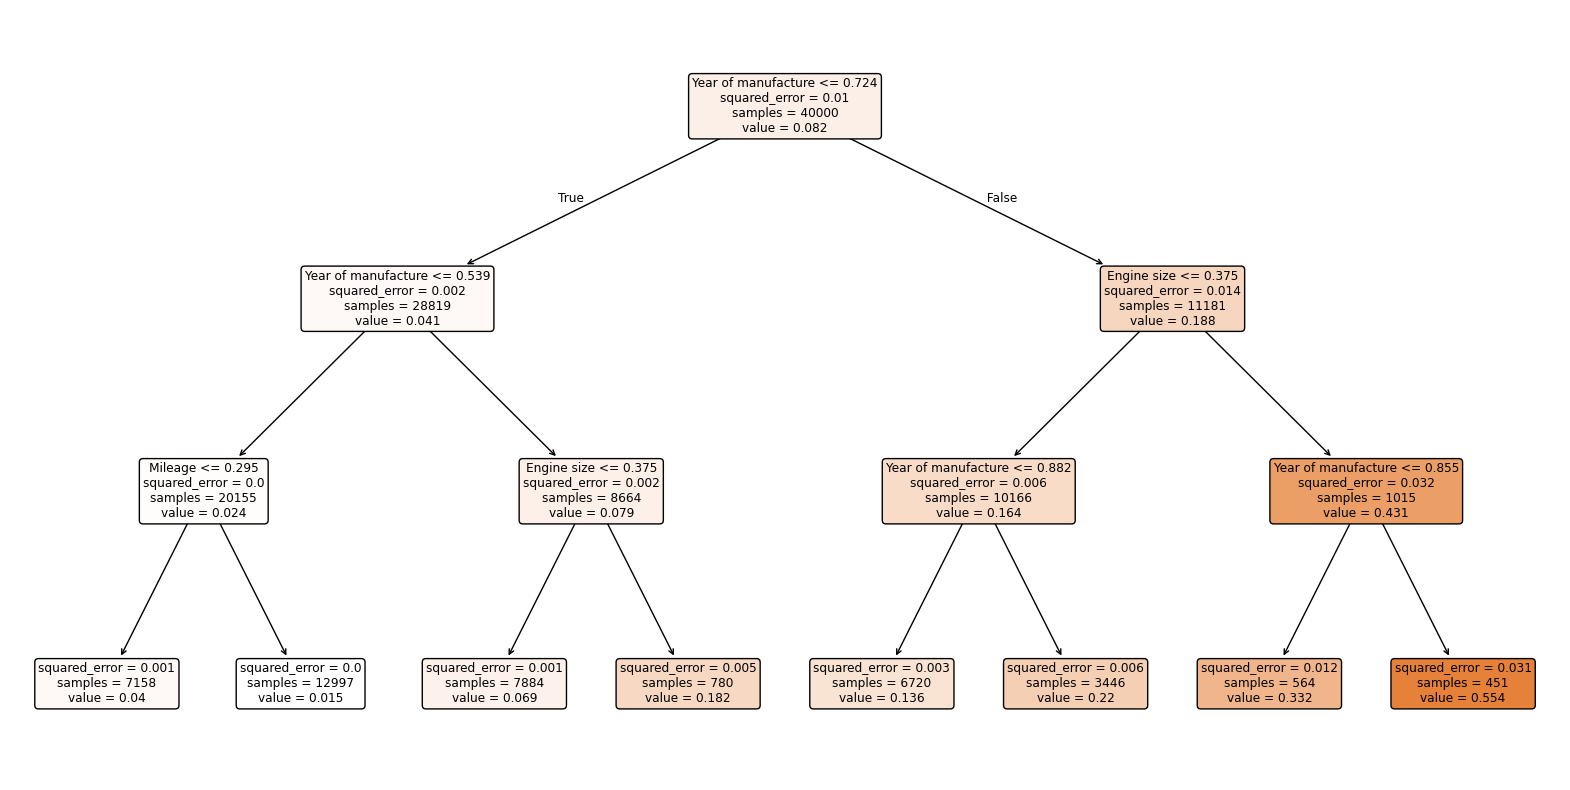

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=vars, rounded=True)
plt.show()

Cela de proba (sempre ao final do código, para que esté todo cargado)

In [ ]:
print(le_Manufacturer.classes_)
print(le_FuelType.classes_)